<a href="https://colab.research.google.com/github/selcia25/tsl/blob/main/FYP_train_CNN-v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = '/content/drive/MyDrive/FYP/dataset_acquisition'

In [3]:
selected_classes = ['1', '2', '3', '4', '5', 'father', 'mother', 'pen', 'pencil', 'time', 'where']

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,       # Rotate images by 20 degrees
    shear_range=0.1,         # Shear intensity
    zoom_range=0.2,          # Zoom into images by 20%
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest',     # Fill empty pixels after transformation
    validation_split=0.2)

In [11]:
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=selected_classes,
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=selected_classes
)

Found 750 images belonging to 11 classes.
Found 184 images belonging to 11 classes.


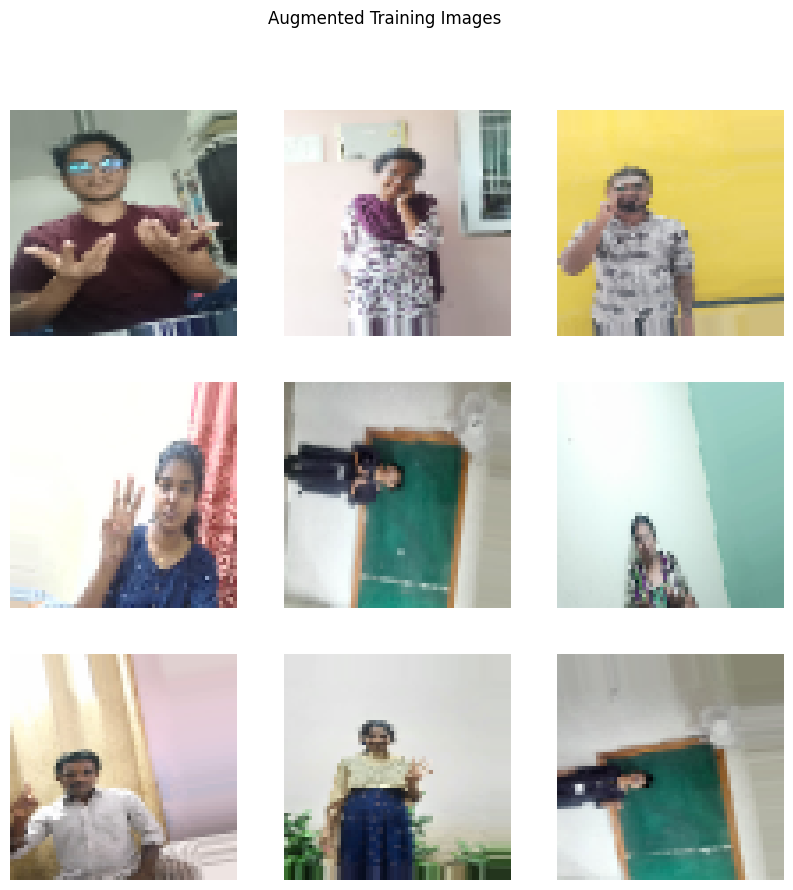

In [15]:
x_batch, y_batch = next(train_data)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle('Augmented Training Images')
plt.show()

In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,571 (6.20 MB)

 Trainable params: 1,626,571 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(train_data, validation_data=val_data, epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 388s 13s/step - accuracy: 0.0937 - loss: 2.4984 - val_accuracy: 0.0815 - val_loss: 2.3979
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.1056 - loss: 2.3987 - val_accuracy: 0.0761 - val_loss: 2.3980
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.0841 - loss: 2.3987 - val_accuracy: 0.0598 - val_loss: 2.3985
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.0734 - loss: 2.3989 - val_accuracy: 0.0815 - val_loss: 2.3982
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.0752 - loss: 2.3984 - val_accuracy: 0.1033 - val_loss: 2.3979
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.0977 - loss: 2.3978 - val_accuracy: 0.0924 - val_loss: 2.3978
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.0759 - loss: 2.3983 - val_accuracy: 0.0870 - val_loss: 2.3979
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1352 - loss: 2.3975 - val_accuracy: 0.0924 - val_loss: 2.3979
E

In [20]:
loss, accuracy = model.evaluate(val_data)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 660ms/step - accuracy: 0.0427 - loss: 2.4069
Validation Accuracy: 4.89%


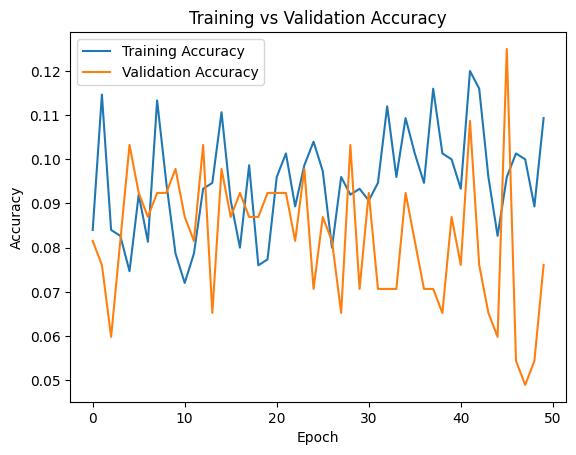

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()